In [1]:
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox
import pandas as pd
import seaborn as sns
import yaml
from calculate_descriptives import (
    calculate_activity_per_cell,
    calculate_number_of_unique_users_per_cell,
)
from common import plot_heatmap, to_matrix, transform
from matplotlib.colors import ListedColormap

with open("../plotting_config.yaml", "r") as fp:
    config = yaml.safe_load(fp)

ox.settings.use_cache = True
ox.settings.log_console = False

In [2]:
data = pd.read_csv(
    "../data/yjmob100k/yjmob100k-dataset1.csv",
    engine="pyarrow",
)
data.head(5)

,uid,d,t,x,y
0,0,0,1,79,86
1,0,0,2,79,86
2,0,0,8,77,86
3,0,0,9,77,86
4,0,0,19,81,89


In [3]:
try:
    activity = pd.read_csv("../output/activity.csv")
except FileNotFoundError:
    activity = calculate_activity_per_cell(data)
    activity.to_csv("../output/activity.csv", index=False)

activity["count_log"] = activity["count"].apply(np.log10).fillna(0)

In [4]:
try:
    unique_users = pd.read_csv("../output/unique_users.csv")
except FileNotFoundError:
    unique_users = calculate_number_of_unique_users_per_cell(data)
    unique_users.to_csv("../output/unique_users.csv", index=False)

unique_users["count_log"] = unique_users["count"].apply(np.log10).fillna(0)

In [5]:
activity_raster = to_matrix(activity, value="count_log")
user_raster = to_matrix(unique_users, value="count_log")

activity_raster_fixed = transform(activity_raster)
user_raster_fixed = transform(user_raster)

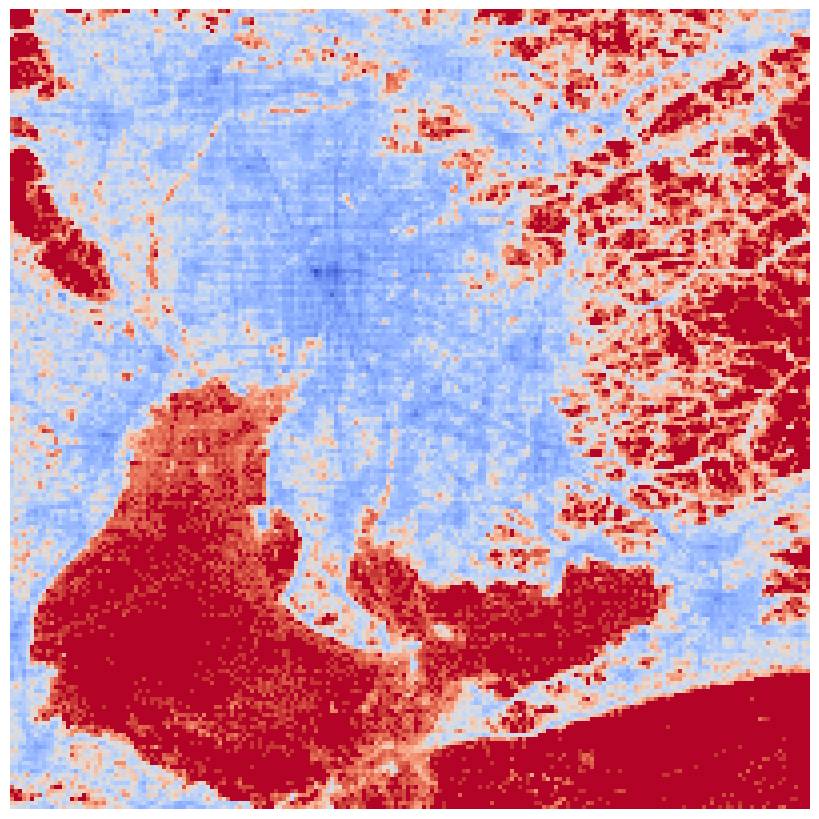

In [6]:
f_ah, a_ah = plot_heatmap(activity_raster_fixed)
f_ah.savefig(
    "../figures/activity_heatmap_fixed.png", dpi=300, metadata=config["metadata"]
)

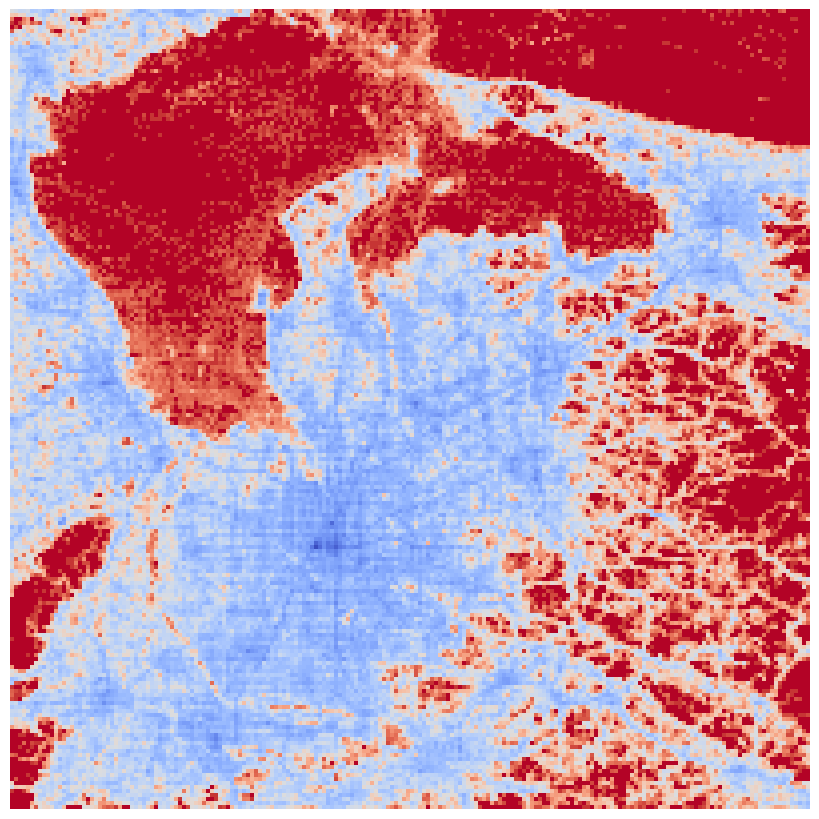

In [7]:
f_ah, a_ah = plot_heatmap(activity_raster)
f_ah.savefig("../figures/activity_heatmap.png", dpi=300, metadata=config["metadata"])

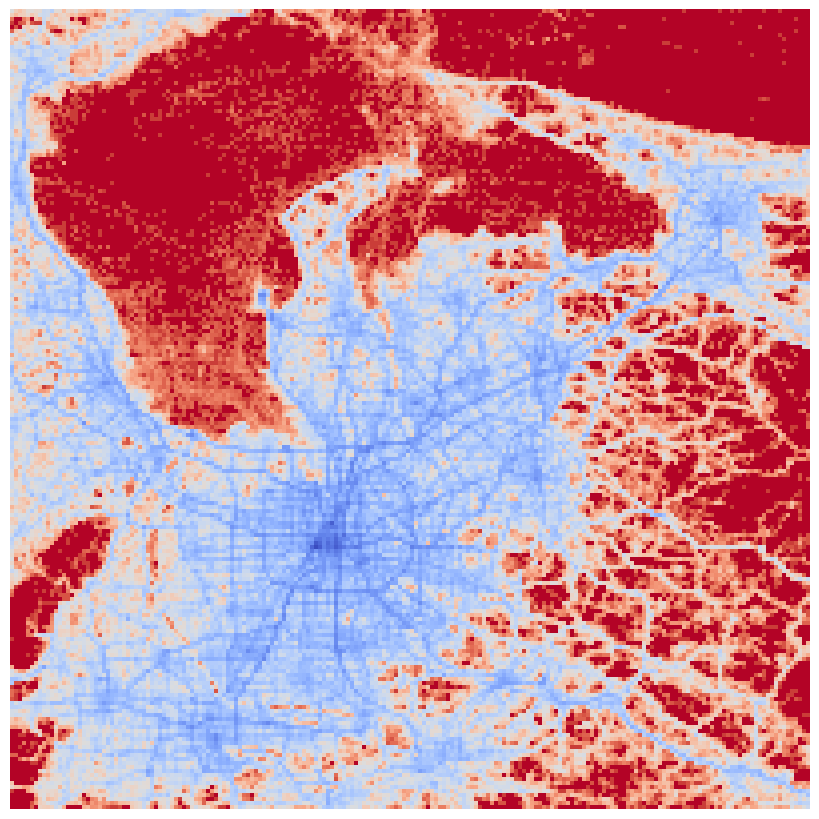

In [8]:
f_uh, a_uh = plot_heatmap(user_raster)
f_uh.savefig("../figures/user_heatmap.png", dpi=300, metadata=config["metadata"])

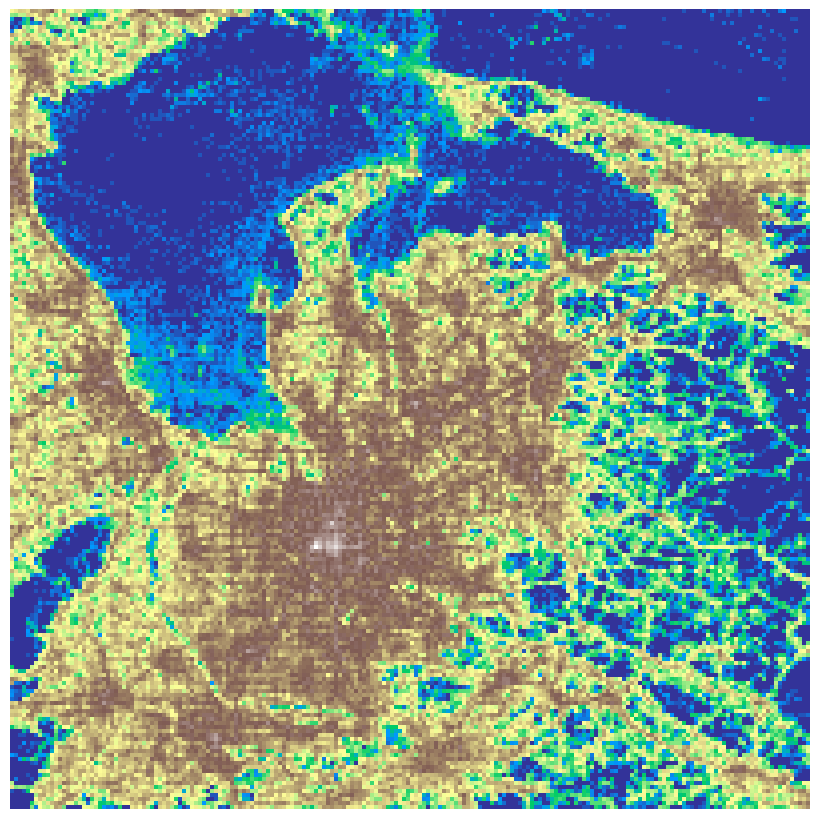

In [9]:
f_ah2, a_ah2 = plot_heatmap(activity_raster, cmap="terrain")
f_ah2.savefig(
    "../figures/activity_heatmap_terrain.png", dpi=300, metadata=config["metadata"]
)

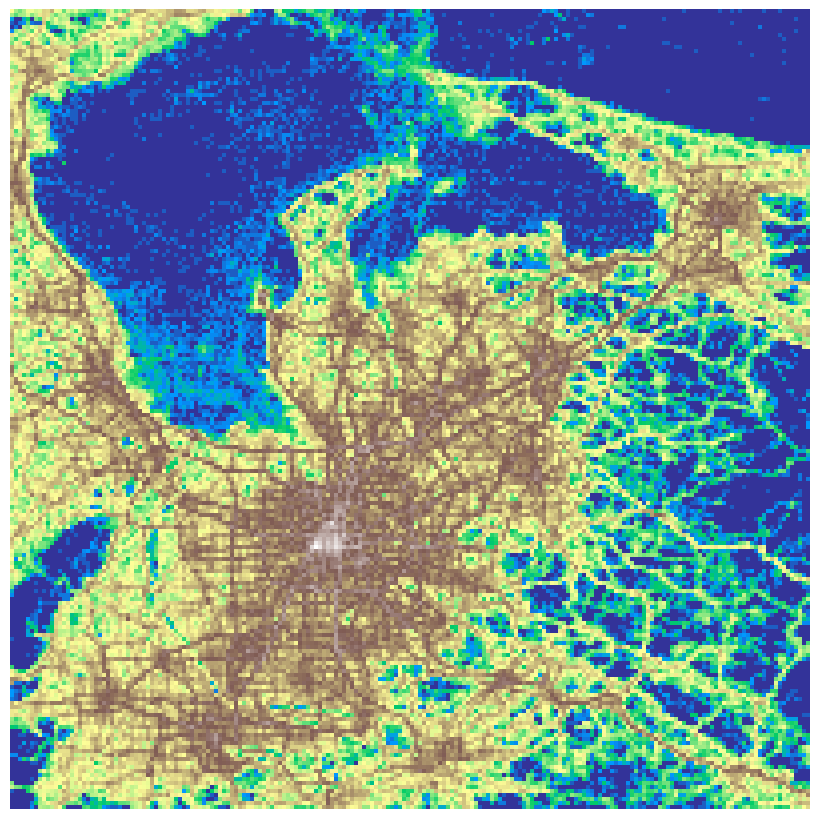

In [10]:
f_uh2, a_uh2 = plot_heatmap(user_raster, cmap="terrain")
f_uh2.savefig(
    "../figures/user_heatmap_terrain.png", dpi=300, metadata=config["metadata"]
)

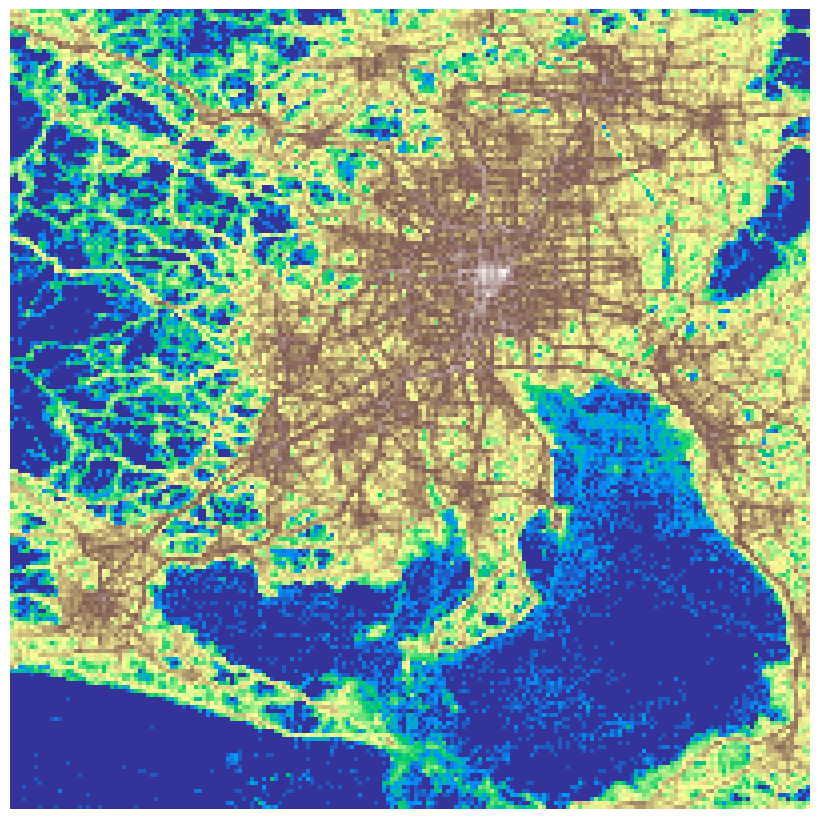

In [11]:
user_raster_rotated = np.rot90(user_raster, k=2)
f_uh2, a_uh2 = plot_heatmap(user_raster_rotated, cmap="terrain")
f_uh2.savefig(
    "../figures/user_heatmap_terrain_rot.png", dpi=300, metadata=config["metadata"]
)

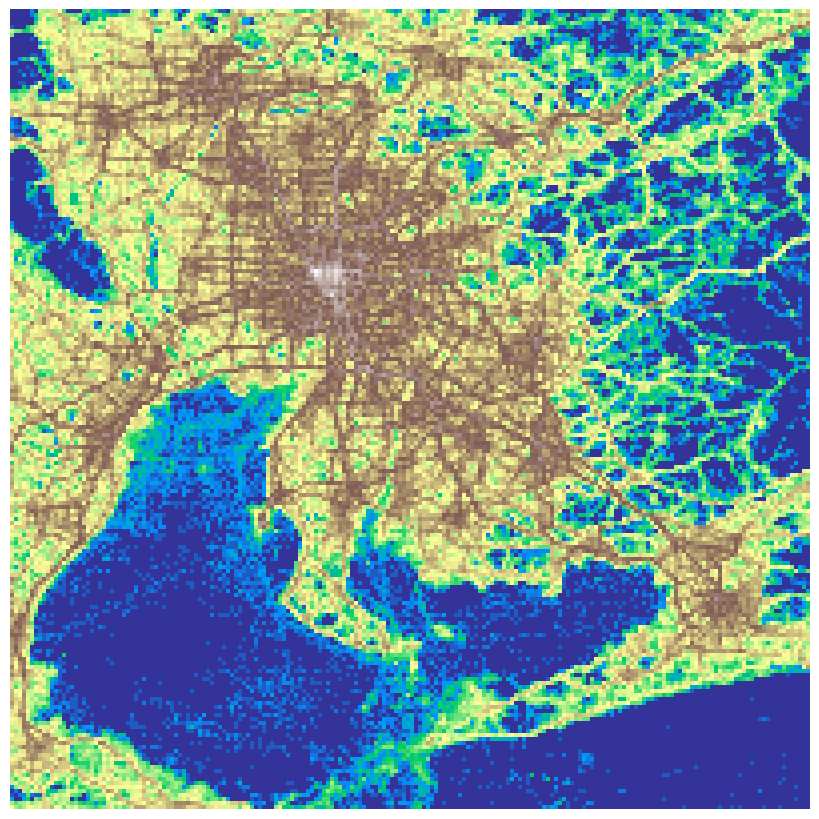

In [12]:
f_uh2, a_uh2 = plot_heatmap(user_raster_fixed, cmap="terrain")
f_uh2.savefig(
    "../figures/user_heatmap_terrain_fixed.png", dpi=300, metadata=config["metadata"]
)

In [31]:
from matplotlib.patheffects import SimpleLineShadow

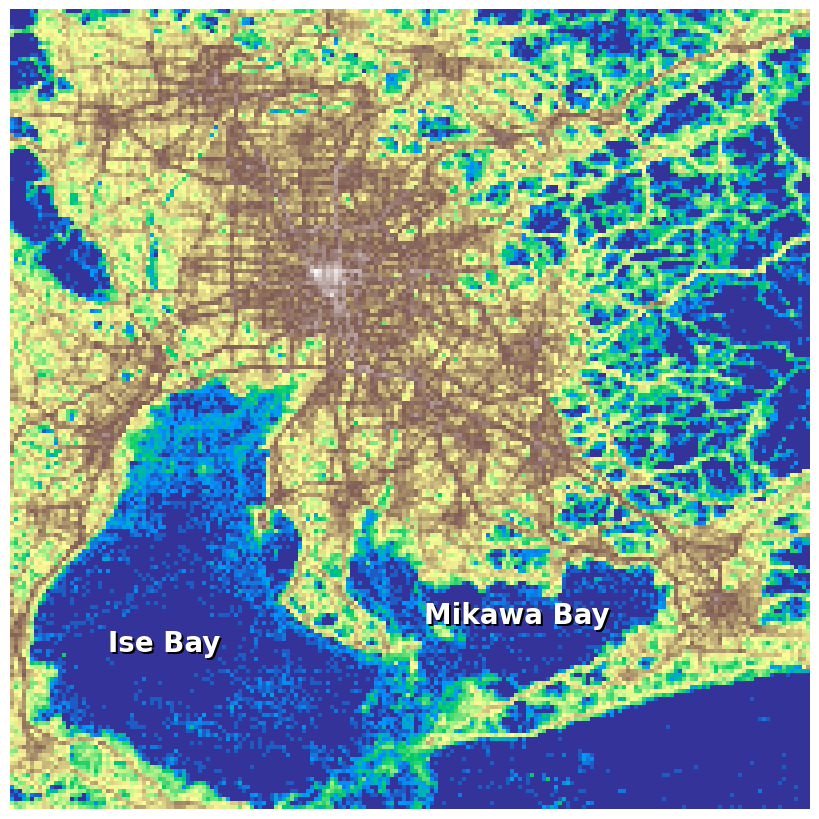

In [42]:
f_uh3, a_uh3 = plot_heatmap(user_raster_fixed, cmap="terrain")
a_uh3.text(
    24.5, 160.5, "Ise Bay", fontdict={"size": 20, "weight": "bold", "color": "k"}
)
a_uh3.text(
    24, 160, "Ise Bay", fontdict={"size": 20, "weight": "bold", "color": "white"}
)
a_uh3.text(
    24,
    160,
    "Ise Bay",
    fontdict={
        "size": 20,
        "color": "white",
        "path_effects": [SimpleLineShadow()],
    },
)
a_uh3.text(
    103.5, 153.5, "Mikawa Bay", fontdict={"size": 20, "weight": "bold", "color": "k"}
)
a_uh3.text(
    103, 153, "Mikawa Bay", fontdict={"size": 20, "weight": "bold", "color": "white"}
)
f_uh3.savefig(
    "../figures/user_heatmap_terrain_fixed_label.png",
    dpi=300,
    metadata=config["metadata"],
)

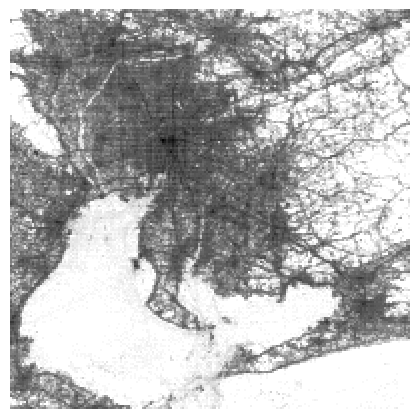

In [13]:
f, _ = plot_heatmap(activity_raster_fixed, figsize=(4, 4), dpi=100, cmap="Greys")

f.savefig(
    "../figures/activity_greys.png",
    facecolor="white",
    pad_inches=0,
    metadata=config["metadata"],
)

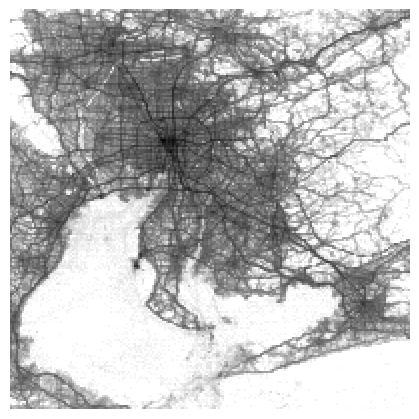

In [14]:
f, _ = plot_heatmap(user_raster_fixed, figsize=(4, 4), dpi=100, cmap="Greys")

f.savefig(
    "../figures/user_greys.png",
    facecolor="white",
    pad_inches=0,
    metadata=config["metadata"],
)

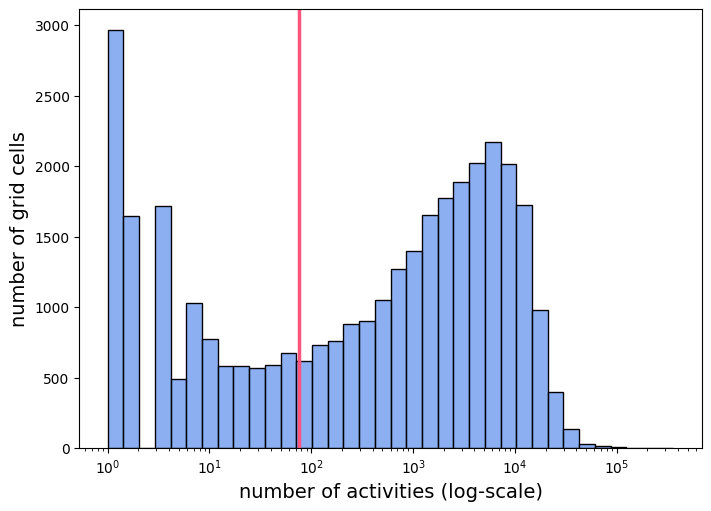

In [15]:
fig_ah, ax_ah = plt.subplots(figsize=(7, 5), layout="constrained")
sns.histplot(activity["count"], log_scale=(True, False), color="#6495ed", ax=ax_ah)
ax_ah.set_xlabel("number of activities (log-scale)", fontsize=14)
ax_ah.set_ylabel("number of grid cells", fontsize=14)
ax_ah.axvline(75, color="#ff557f", lw=2.5)
for i in config["formats"]:
    fig_ah.savefig(
        f"../figures/activity_histogram.{i}", dpi=80, metadata=config["metadata"]
    )

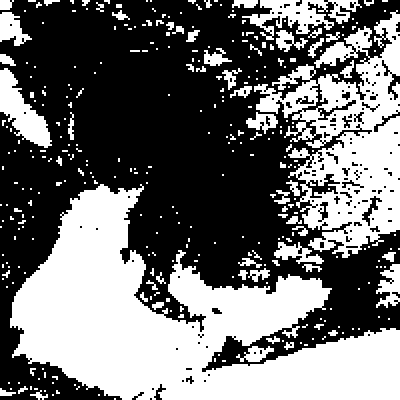

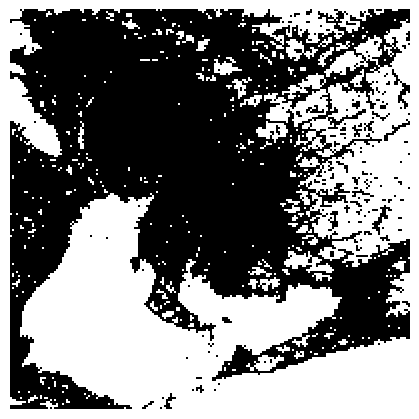

In [54]:
activity["cut"] = activity["count"].apply(lambda x: 0 if x < 75 else 1)
activity_raster_bin = to_matrix(activity, value="cut")
activity_raster_bin = transform(activity_raster_bin)

f_b, _ = plot_heatmap(activity_raster_bin, figsize=(400, 400), dpi=1, cmap="binary")
f_b.savefig(
    "../figures/activity_cut.png",
    facecolor="white",
    pad_inches=0,
    metadata=config["metadata"],
)
f_b, _ = plot_heatmap(activity_raster_bin, figsize=(4, 4), dpi=100, cmap="binary")
f_b.savefig(
    "../figures/activity_cut_dpi_fixed.png",
    facecolor="white",
    pad_inches=0,
    metadata=config["metadata"],
)

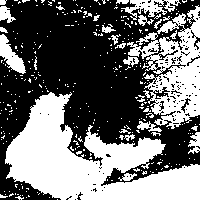

In [17]:
activity["cut"] = activity["count"].apply(lambda x: 0 if x < 75 else 1)
activity_raster_bin = to_matrix(activity, value="cut")
activity_raster_bin = transform(activity_raster_bin)

f_b, _ = plot_heatmap(activity_raster_bin, figsize=(200, 200), dpi=1, cmap="binary")
f_b.savefig(
    "../figures/activity_cut_200.png",
    dpi=1,
    facecolor="white",
    pad_inches=0,
    metadata=config["metadata"],
)

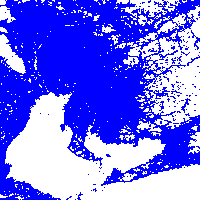

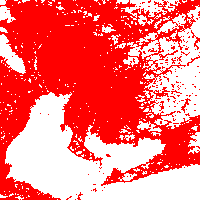

In [18]:
# ListedColormap(["#ffffff", "#6495ed"])
f_blue, _ = plot_heatmap(
    activity_raster_bin,
    figsize=(200, 200),
    dpi=1,
    cmap=ListedColormap(["#ffffff", "#0000ff"]),
)
f_blue.savefig(
    "../figures/activity_cut_200_blue.png",
    dpi=1,
    facecolor="white",
    pad_inches=0,
    metadata=config["metadata"],
)
f_red, _ = plot_heatmap(
    activity_raster_bin,
    figsize=(200, 200),
    dpi=1,
    cmap=ListedColormap(["#ffffff", "#ff0000"]),
)
f_red.savefig(
    "../figures/activity_cut_200_red.png",
    dpi=1,
    facecolor="white",
    pad_inches=0,
    metadata=config["metadata"],
)

<Axes: xlabel='count_log', ylabel='Count'>

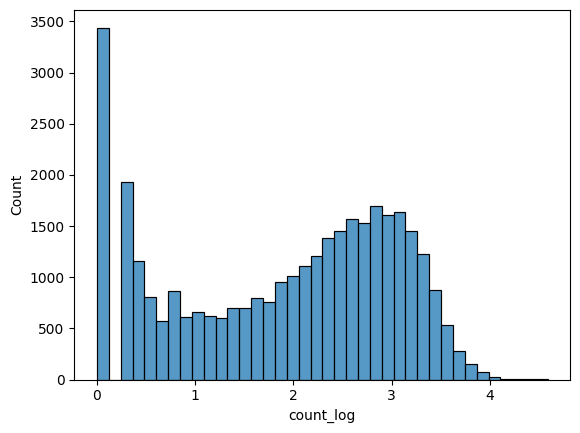

In [19]:
sns.histplot(unique_users["count_log"], log_scale=(False, False))

In [20]:
def fourify(x, levels: tuple[int, int, int] = (1250, 2500, 7500)):
    result = 0
    if x > levels[0]:
        result = 1
    if x > levels[1]:
        result = 2
    if x > levels[2]:
        result = 3
    return result

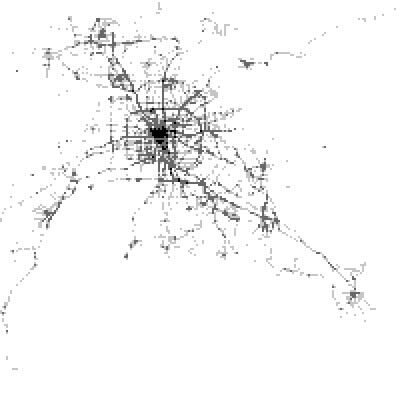

In [21]:
# unique_users["cut"] = unique_users["count"].apply(lambda x: 0 if x < 2000 else 1)
unique_users["cut"] = unique_users["count"].apply(fourify)
unique_users["cut"] = unique_users["count"].apply(
    lambda x: fourify(x, (1750, 3000, 9000))
)
user_raster_bin = to_matrix(unique_users, value="cut")
user_raster_bin = transform(user_raster_bin)

f_b, _ = plot_heatmap(user_raster_bin, figsize=(400, 400), dpi=1, cmap="Greys")
f_b.savefig(
    "../figures/user_cut.png",
    facecolor="white",
    pad_inches=0,
    metadata=config["metadata"],
)

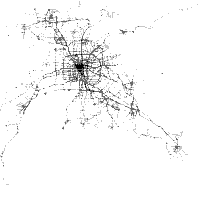

In [22]:
unique_users["cut"] = unique_users["count"].apply(fourify)
unique_users["cut"] = unique_users["count"].apply(
    lambda x: fourify(x, (1750, 3000, 9000))
)
user_raster_bin = to_matrix(unique_users, value="cut")
user_raster_bin = transform(user_raster_bin)

f_b, _ = plot_heatmap(user_raster_bin, figsize=(200, 200), dpi=1, cmap="Greys")
f_b.savefig(
    "../figures/user_cut_200.png",
    facecolor="white",
    pad_inches=0,
    metadata=config["metadata"],
)

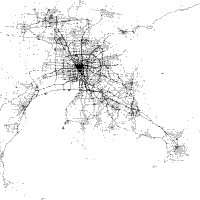

In [53]:
unique_users["bin"] = unique_users["count"].apply(lambda x: 1 if x > 2.8 else 0)
unique_users["cut"] = unique_users["count"].apply(
    lambda x: fourify(x, (1000, 3000, 9000))
)
user_raster_bin = to_matrix(unique_users, value="cut")
user_raster_bin = transform(user_raster_bin)

f_b, _ = plot_heatmap(user_raster_bin, figsize=(200, 200), dpi=1, cmap="Greys")
f_b.savefig(
    "../figures/user_bin_200.png",
    facecolor="white",
    pad_inches=0,
    metadata=config["metadata"],
)